In [1]:
import gym
import tensorflow as tf
import numpy as np
import os
import time

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from rl_utils import PolicyGradient, run_rollouts, render_NOerrors

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
    
def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=25)
    display(display_animation(anim, default_mode='loop'))

/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [64]:
exp_name = 'test'
env_name = 'CartPole-v0'

if not(os.path.exists('data')):
    os.makedirs('data')
logdir = exp_name + '_' + env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join('data', logdir)
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

max_path_length = None

tf.reset_default_graph()
PG = PolicyGradient(n_iter=100, max_path_length=50, logdir=os.path.join(logdir, '%d'%1))

Logging data to data/test_CartPole-v0_23-05-2018_00-25-45/1/log.txt
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [65]:
# tf.global_variables_initializer()
frames = PG.train(print_console=True)

********** Iteration 0 ************
334
----------------------------------------
|               Time |            0.79 |
|          Iteration |               0 |
|      AverageReturn |            9.35 |
|          StdReturn |           0.754 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.35 |
|           EpLenStd |           0.754 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |           1e+03 |
----------------------------------------
********** Iteration 1 ************
334
----------------------------------------
|               Time |            1.57 |
|          Iteration |               1 |
|      AverageReturn |            9.42 |
|          StdReturn |           0.764 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.42 |
|           EpLenStd |           0.764 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoF

334
----------------------------------------
|               Time |            12.8 |
|          Iteration |              16 |
|      AverageReturn |            9.33 |
|          StdReturn |           0.807 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.33 |
|           EpLenStd |           0.807 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |         1.7e+04 |
----------------------------------------
********** Iteration 17 ************
334
----------------------------------------
|               Time |            13.5 |
|          Iteration |              17 |
|      AverageReturn |            9.41 |
|          StdReturn |           0.748 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.41 |
|           EpLenStd |           0.748 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |         1.8e+04 |
------------

334
----------------------------------------
|               Time |            24.9 |
|          Iteration |              32 |
|      AverageReturn |            9.26 |
|          StdReturn |           0.768 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.26 |
|           EpLenStd |           0.768 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        3.31e+04 |
----------------------------------------
********** Iteration 33 ************
334
----------------------------------------
|               Time |            25.6 |
|          Iteration |              33 |
|      AverageReturn |            9.34 |
|          StdReturn |           0.794 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.34 |
|           EpLenStd |           0.794 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        3.41e+04 |
------------

334
----------------------------------------
|               Time |            36.7 |
|          Iteration |              48 |
|      AverageReturn |            9.37 |
|          StdReturn |           0.784 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.37 |
|           EpLenStd |           0.784 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        4.91e+04 |
----------------------------------------
********** Iteration 49 ************
334
----------------------------------------
|               Time |            37.4 |
|          Iteration |              49 |
|      AverageReturn |            9.33 |
|          StdReturn |           0.734 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.33 |
|           EpLenStd |           0.734 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        5.01e+04 |
------------

334
----------------------------------------
|               Time |            48.4 |
|          Iteration |              64 |
|      AverageReturn |             9.3 |
|          StdReturn |           0.755 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |             9.3 |
|           EpLenStd |           0.755 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        6.51e+04 |
----------------------------------------
********** Iteration 65 ************
334
----------------------------------------
|               Time |            49.1 |
|          Iteration |              65 |
|      AverageReturn |            9.35 |
|          StdReturn |           0.758 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.35 |
|           EpLenStd |           0.758 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        6.61e+04 |
------------

334
----------------------------------------
|               Time |            60.1 |
|          Iteration |              80 |
|      AverageReturn |             9.4 |
|          StdReturn |           0.743 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |             9.4 |
|           EpLenStd |           0.743 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        8.12e+04 |
----------------------------------------
********** Iteration 81 ************
334
----------------------------------------
|               Time |            60.8 |
|          Iteration |              81 |
|      AverageReturn |            9.36 |
|          StdReturn |           0.744 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.36 |
|           EpLenStd |           0.744 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        8.22e+04 |
------------

334
----------------------------------------
|               Time |            71.9 |
|          Iteration |              96 |
|      AverageReturn |            9.43 |
|          StdReturn |           0.742 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.43 |
|           EpLenStd |           0.742 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        9.72e+04 |
----------------------------------------
********** Iteration 97 ************
334
----------------------------------------
|               Time |            72.7 |
|          Iteration |              97 |
|      AverageReturn |            9.39 |
|          StdReturn |            0.81 |
|          MaxReturn |              11 |
|          MinReturn |               8 |
|          EpLenMean |            9.39 |
|           EpLenStd |            0.81 |
| TimestepsThisBatch |           1e+03 |
|     TimestepsSoFar |        9.82e+04 |
------------


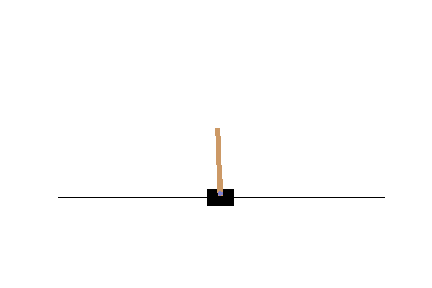
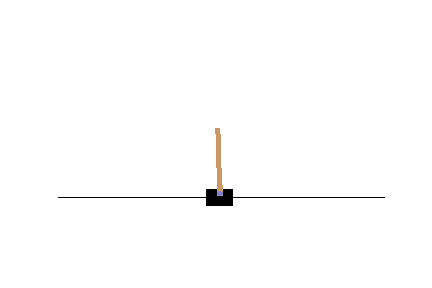
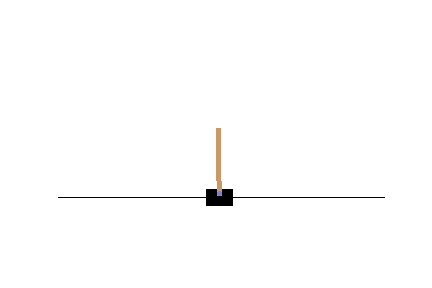
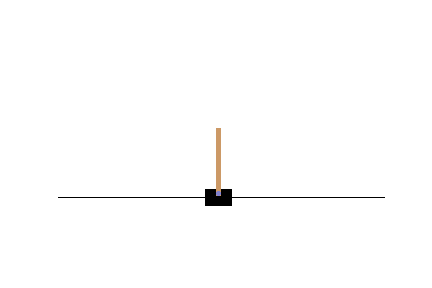
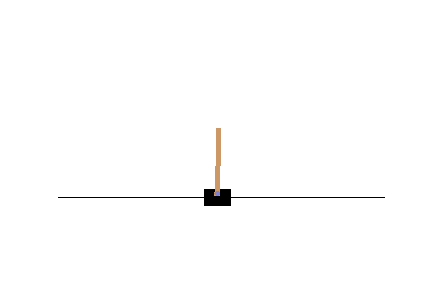
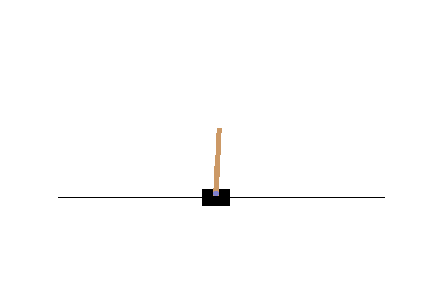
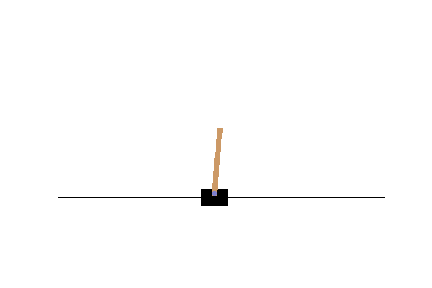
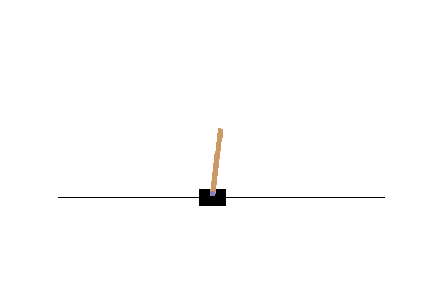
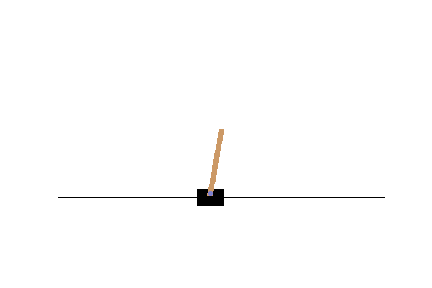
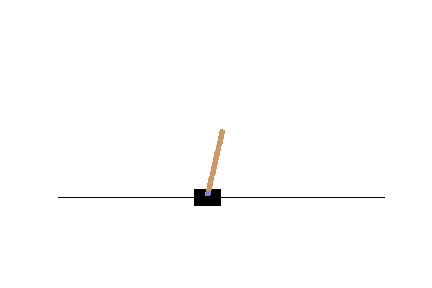

In [66]:

display_frames_as_gif(frames)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


FailedPreconditionError: Attempting to use uninitialized value policy/policyout/bias
	 [[Node: policy/policyout/bias/read = Identity[T=DT_FLOAT, _class=["loc:@policy/policyout/bias"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](policy/policyout/bias)]]

Caused by op 'policy/policyout/bias/read', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-9018e5bf39f1>", line 13, in <module>
    PG = PolicyGradient(n_iter=100, logdir=os.path.join(logdir, '%d'%1))
  File "/mnt/f/Awesome/cs294-linux/hw2/rl_utils.py", line 92, in __init__
    sy_logits_na = build_mlp(self.sy_ob_no, ac_dim, 'policy', n_layers=n_layers, size=size)
  File "/mnt/f/Awesome/cs294-linux/hw2/rl_utils.py", line 26, in build_mlp
    return tf.layers.dense(a, output_size, name=scope+'out', use_bias=True)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/layers/core.py", line 253, in dense
    return layer.apply(inputs)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/layers/base.py", line 825, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/layers/base.py", line 696, in __call__
    self.build(input_shapes)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/layers/core.py", line 146, in build
    trainable=True)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/layers/base.py", line 546, in add_variable
    partitioner=partitioner)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/training/checkpointable.py", line 415, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 1297, in get_variable
    constraint=constraint)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 1093, in get_variable
    constraint=constraint)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 439, in get_variable
    constraint=constraint)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 408, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 800, in _get_single_variable
    use_resource=use_resource)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 2157, in variable
    use_resource=use_resource)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 2147, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 2130, in default_variable_creator
    constraint=constraint)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 235, in __init__
    constraint=constraint)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 391, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3053, in identity
    "Identity", input=input, name=name)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value policy/policyout/bias
	 [[Node: policy/policyout/bias/read = Identity[T=DT_FLOAT, _class=["loc:@policy/policyout/bias"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](policy/policyout/bias)]]
